In [80]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [88]:
### read in from NetCDF
datastr = "/Users/madi/Desktop/Diablo/Diablo_runs/shear_scaling/u2.8_f_005_smaller_dom/"
fname = '%smean_prof_stat.nc'% datastr
    
ds = xr.open_dataset(fname)

<xarray.Dataset>
Dimensions:    (t: 1349, x: 256, y: 336, z: 256)
Coordinates:
  * x          (x) float64 0.0 0.02813 0.05625 0.08438 ... 7.116 7.144 7.172
  * y          (y) float64 0.0006356 0.001918 0.003222 ... 8.806 8.883 8.961
  * z          (z) float64 0.0 0.02813 0.05625 0.08438 ... 7.116 7.144 7.172
  * t          (t) float64 1.903e+04 1.903e+04 1.904e+04 ... 6.554e+04 9.969e+36
Data variables:
    UME_TOT    (t, y) float64 ...
    WME_TOT    (t, y) float64 ...
    U_RMS      (t, y) float64 ...
    V_RMS      (t, y) float64 ...
    W_RMS      (t, y) float64 ...
    Temp       (t, y) float64 ...
    Sal        (t, y) float64 ...
    Temp_rms   (t, y) float64 ...
    Sal_rms    (t, y) float64 ...
    Temp_grad  (t, y) float64 ...
    Sal_grad   (t, y) float64 ...
    u_grad     (t, y) float64 ...
    w_grad     (t, y) float64 ...
    uv         (t, y) float64 ...
    wv         (t, y) float64 ...
    uw         (t, y) float64 ...
    bprod      (t, y) float64 ...
    sprod      

In [91]:
### remove dupliacted y values
_, index = np.unique(ds['y'], return_index=True)
dtmp = ds.isel(y=index)

_, index = np.unique(dtmp['t'], return_index=True)
dtmp = dtmp.isel(t=index)


In [107]:
### just add a new variable to existing Dataset
x = dtmp.assign(TKE=lambda dtmp: dtmp.U_RMS **2 + dtmp.V_RMS**2 + dtmp.W_RMS**2)
# still don't quite understand this bit
alpha = 3.8e-5
beta = 7.8e-4

dTdy = x.Temp.differentiate("y")
dSdy = x.Sal.differentiate("y")
N = 9.81*(-alpha*dTdy + beta*dSdy)

x = dtmp.assign(N=lambda dtmp: N)


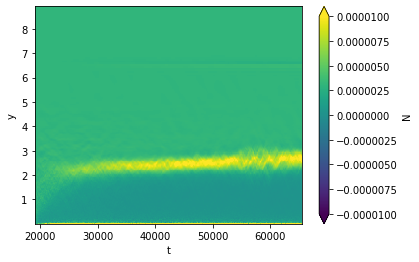

In [105]:
### plotting


x.N[1:-1,1:-1].transpose().plot(vmin = -1e-5, vmax =1e-5)
plt.axis()
